In [1]:
%matplotlib inline

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib

### 1.1 Import csv file

In [4]:
full_data = pd.read_csv("./datasets/application_record.csv")
credit_data = pd.read_csv("./datasets/credit_record.csv")

In [5]:
full_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [6]:
credit_data

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


### 1.2 Create dataframe an export to csv

In [7]:
pd.options.mode.chained_assignment = None


In [8]:
#Lấy số tháng dư tín dụng (Lấy min do Mothn_balance là số âm)
begin_month = pd.DataFrame(credit_data.groupby("ID")["MONTHS_BALANCE"].min())
begin_month = begin_month.rename(columns={"MONTHS_BALANCE":"Account age"})
#Merge 2 data lại để tổng hợp dữ liệu
full_data = pd.merge(full_data, begin_month, on="ID", how="left")

#Tinsh độ rủi ro của khách hàng
credit_data['Is high risk'] = None
credit_data['Is high risk'][credit_data['STATUS']=="2"] = "Yes"
credit_data['Is high risk'][credit_data['STATUS']=="3"] = "Yes"
credit_data['Is high risk'][credit_data['STATUS']=="4"] = "Yes"
credit_data['Is high risk'][credit_data['STATUS']=="5"] = "Yes"

cpunt = credit_data.groupby("ID").count()
cpunt['Is high risk'][cpunt["Is high risk"] > 0 ]= 1    #Yes
cpunt['Is high risk'][cpunt["Is high risk"] == 0 ]= 0   #No
cpunt = cpunt[["Is high risk"]] ## Chỉ lấy giá trị risk_value

#Merge thêm cột risk_value theo ID
full_data = pd.merge(full_data, cpunt, on="ID", how="inner")


In [9]:
full_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account age,Is high risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,-11.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-23.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-32.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,-9.0,1


### 1.3 Rename features's name

In [10]:
full_data = full_data.rename(columns={
    'CODE_GENDER':'Gender',
    'FLAG_OWN_CAR':'Has a car',
    'FLAG_OWN_REALTY':'Has a property',
    'CNT_CHILDREN':'Children count',
    'AMT_INCOME_TOTAL':'Income',
    'NAME_INCOME_TYPE':'Employment status',
    'NAME_EDUCATION_TYPE':'Education level',
    'NAME_FAMILY_STATUS':'Marital status',
    'NAME_HOUSING_TYPE':'Dwelling',
    'DAYS_BIRTH':'Age',
    'DAYS_EMPLOYED': 'Employment length',
    'FLAG_MOBIL': 'Has a mobile phone',
    'FLAG_WORK_PHONE': 'Has a work phone',
    'FLAG_PHONE': 'Has a phone',
    'FLAG_EMAIL': 'Has an email',
    'OCCUPATION_TYPE': 'Job title',
    'CNT_FAM_MEMBERS': 'Family member count',
    'Account age': 'Account age'
})

full_data

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,-11.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-23.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,-32.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,-9.0,1


### 1.4 Split the data into training and test, create a copy of the dataset

In [11]:
def split_data(df, test_size):
    train_df, test_df = train_test_split(df, test_size= test_size, random_state=42)
    return train_df.reset_index(drop=True), test_df.reset_index(drop=True)

In [12]:
train_original, test_original = split_data(full_data, 0.2)

In [13]:
train_original.shape

(29165, 20)

In [14]:
test_original.shape

(7292, 20)

In [15]:
train_original.to_csv("./datasets/train.csv", index=False)
test_original.to_csv("./datasets/test.csv", index=False)

In [16]:
train_copy = train_original.copy()
test_copy = test_original.copy()

## 2. Expore the data

### 2.0 Pandas profiting

In [17]:
#EDA dữ liệu thành file html
# profile_report = ProfileReport(full_data,dark_mode= True)
# profile_report.to_file("./pandas_profile_file/credit_pred_profile.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 73.71it/s]


### 2.1 Quick show data

In [18]:
full_data.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0


In [19]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   Gender               36457 non-null  object 
 2   Has a car            36457 non-null  object 
 3   Has a property       36457 non-null  object 
 4   Children count       36457 non-null  int64  
 5   Income               36457 non-null  float64
 6   Employment status    36457 non-null  object 
 7   Education level      36457 non-null  object 
 8   Marital status       36457 non-null  object 
 9   Dwelling             36457 non-null  object 
 10  Age                  36457 non-null  int64  
 11  Employment length    36457 non-null  int64  
 12  Has a mobile phone   36457 non-null  int64  
 13  Has a work phone     36457 non-null  int64  
 14  Has a phone          36457 non-null  int64  
 15  Has an email         36457 non-null 

In [20]:
full_data.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,-26.164193,0.016897
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854,0.128886
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


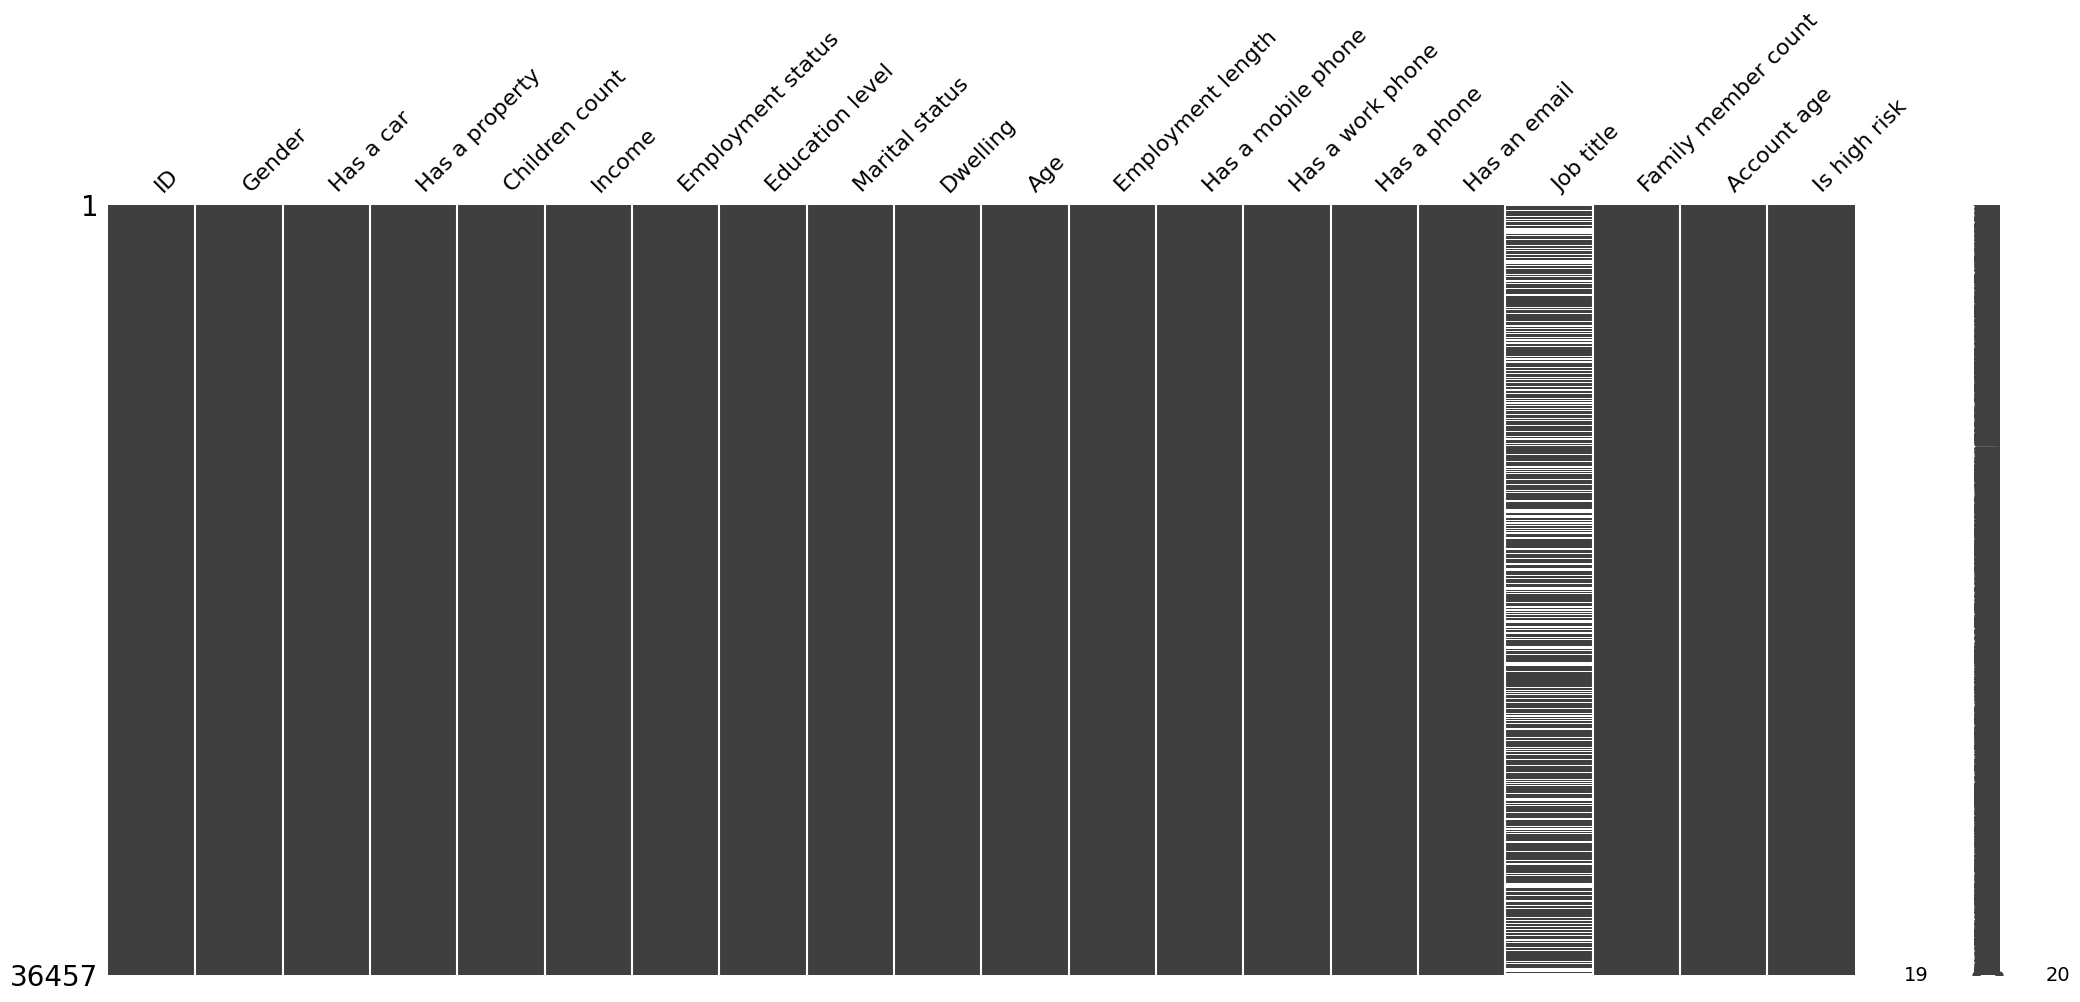

In [21]:
msno.matrix(full_data)
plt.show()

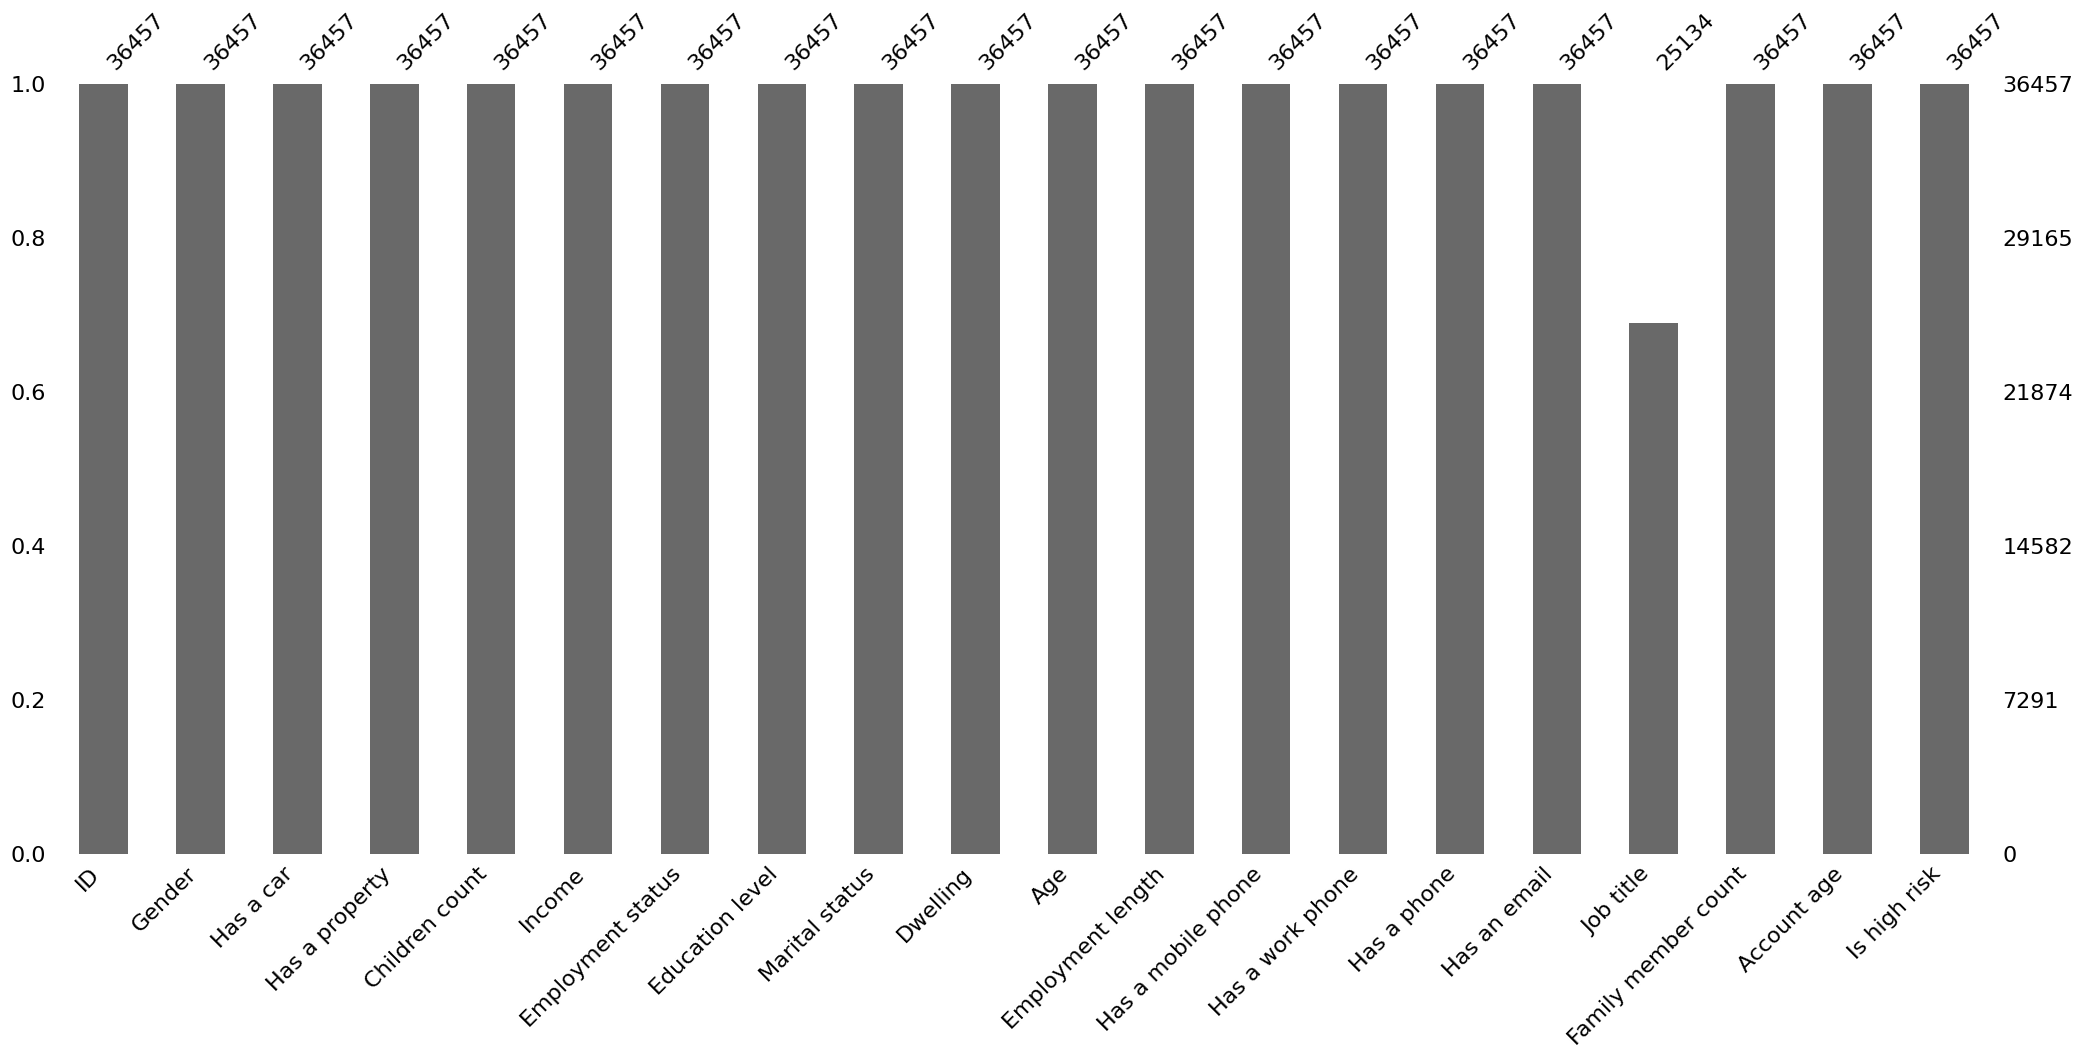

In [22]:
msno.bar(full_data)
plt.show()

<i>Nhận xét: </i>Cột Job title là cột thiếu rất nhiều dữ liệu

### 2.2 Functions used to visualize

In [23]:
# Hàm trả về số lượng và % xuất hiện
def  value_count_norm_cal(df, feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [50]:
# Hàm trả về dữ liệu tổng quan
def get_info_feat(df,feature):
    match feature:
        case 'Age':
            # Chuyển Age từ dạng ngày sang thành dạng năm (365.25 là tổng số ngày trên năm có năm nhuận)
            print('Description:\n{}'.format((np.abs(df[feature])/365.25).describe()))
            print('*'*50)
            print('Object type:{}'.format(df[feature].dtype))
        case 'Employment length':
            # Chỉ trọn những người có thời gian âm còn lại bỏ qua những người đã nghỉ việc và thất nghiệp
            employment_len_no_ret = df['Employment length'][df['Employment length'] < 0]
            employment_len_no_ret_yrs = np.abs(employment_len_no_ret)/365.25
            print('Description:\n{}'.format((employment_len_no_ret_yrs).describe()))
            print('*'*50)
            print('Object type:{}'.format(employment_len_no_ret.dtype))
        case 'Account age':
            # Đổi account age từ số âm thành số dương
            print('Description:\n{}'.format((np.abs(df[feature])).describe()))
            print('*'*50)
            print('Object type:{}'.format(df[feature].dtype))
        case _:
            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            value_cnt = value_count_norm_cal(df,feature)
            print('Value count:\n{}'.format(value_cnt))

In [29]:
# Hàm trả về biểu đồ pie plot
def create_pie_plot(df,feature):
    match feature:
        case 'Dwelling' | 'Education level':
            ratio_size = value_count_norm_cal(df, feature)
            ratio_size_len = len(ratio_size.index)
            ratio_list = []
            for i in range(ratio_size_len):
                ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
            fig, ax = plt.subplots(figsize=(8,8))
            # %1.2f%% hiển thị pie chart và số 2 số sau chữ số thập phân
            plt.pie(ratio_list, startangle=90, wedgeprops={'edgecolor' :'black'})
            plt.title('Pie chart of {}'.format(feature))
            plt.legend(loc='best',labels=ratio_size.index)
            plt.axis('equal')
            return plt.show()
        case _:
            ratio_size = value_count_norm_cal(df, feature)
            ratio_size_len = len(ratio_size.index)
            ratio_list = []
            for i in range(ratio_size_len):
                ratio_list.append(ratio_size.iloc[i]['Frequency (%)'])
            fig, ax = plt.subplots(figsize=(8,8))
            # %1.2f%% hiển thị pie chart và số 2 số sau chữ số thập phân
            plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor' :'black'})
            plt.title('Pie chart of {}'.format(feature))
            plt.legend(loc='best')
            plt.axis('equal')
            return plt.show()

In [31]:
# function to create a bar chart plot
def create_bar_plot(df,feature):
    match feature:
        case 'Marital status' | 'Dwelling' | 'Job title' | 'Employment status' | 'Education level':
            fig, ax = plt.subplots(figsize=(6,10))
            sns.barplot(x=value_count_norm_cal(df,feature).index,y=value_count_norm_cal(df,feature).values[:,0])
            ax.set_xticklabels(labels=value_count_norm_cal(df,feature).index,rotation=45,ha='right')
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            plt.title('{} count'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(6,10))
            sns.barplot(x=value_count_norm_cal(df,feature).index,y=value_count_norm_cal(df,feature).values[:,0])
            plt.xlabel('{}'.format(feature))
            plt.ylabel('Count')
            plt.title('{} count'.format(feature))
            return plt.show()

In [33]:
# Hàm trả về biểu đồ box-plot
def create_box_plot(df,feature):
    match feature:
        case 'Age':
            fig, ax = plt.subplots(figsize=(2,8))
            # Đổi từ số ngày sang số năm
            sns.boxplot(y=np.abs(df[feature])/365.25)
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()
        case 'Children count':
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            plt.yticks(np.arange(0,df[feature].max(),1))
            return plt.show()
        case 'Employment length':
            fig, ax = plt.subplots(figsize=(2,8))
            employment_len_no_ret = df['Employment length'][df['Employment length'] < 0]
            # employement length là số âm nên lấy trị tuyệt đối và đổi ra ngày
            employment_len_no_ret_yrs = np.abs(employment_len_no_ret)/365.25
            sns.boxplot(y=employment_len_no_ret_yrs)
            plt.title('{} distribution(Boxplot)'.format(feature))
            plt.yticks(np.arange(0,employment_len_no_ret_yrs.max(),2))
            return plt.show()
        case 'Income':
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            # Loại bỏ ký hiệu đặc biệt
            ax.get_yaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            return plt.show()
        case 'Account age':
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=np.abs(df[feature]))
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()

In [38]:
# Hàm vẽ biểu đồ histogram
def create_hist_plot(df,feature, the_bins=50):
    match feature:
        case 'Age':
            fig, ax = plt.subplots(figsize=(18,10))
            # Đổi Age thành số tuổi
            sns.histplot(np.abs(df[feature])/365.25,bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case 'Income':
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(df[feature],bins=the_bins,kde=True)
            # Loại bỏ các ký hiệu đặc biệt
            ax.get_xaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case 'Employment length':
            employment_len_no_ret = df['Employment length'][df['Employment length'] < 0]
            # employement length là số âm nên lấy trị tuyệt đối và đổi ra ngày
            employment_len_no_ret_yrs = np.abs(employment_len_no_ret)/365.25
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(employment_len_no_ret_yrs,bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case 'Account age':
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(np.abs(df[feature]),bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()
        case _:
            fig, ax = plt.subplots(figsize=(18,10))
            sns.histplot(df[feature],bins=the_bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()

In [40]:
# High risk vs low risk applicants compared on a box plot
def low_high_risk_box_plot(df,feature):
    match feature:
        case 'Age':
            print(np.abs(df.groupby('Is high risk')[feature].mean()/365.25))
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=np.abs(df[feature])/365.25,x=df['Is high risk'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            plt.title('High risk individuals grouped by age')
            return plt.show()
        case 'Income':
            print(np.abs(df.groupby('Is high risk')[feature].mean()))
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=np.abs(df[feature]),x=df['Is high risk'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            # suppress scientific notation
            ax.get_yaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
            plt.title('High risk individuals grouped by {}'.format(feature))
            return plt.show()
        case 'Employment length':
            #checking is an applicant is high risk or not (for those who have negative employment length aka the employed ones)
            employment_no_ret = df['Employment length'][df['Employment length'] <0]
            employment_no_ret_idx = employment_no_ret.index
            employment_len_no_ret_yrs = np.abs(employment_no_ret)/365.25
            employment_no_ret_df = df.iloc[employment_no_ret_idx][['Employment length','Is high risk']]
            employment_no_ret_is_high_risk = employment_no_ret_df.groupby('Is high risk')['Employment length'].mean()
            # compare the age of high risk individuals with the age of low risk individuals (those who are employed)
            print(np.abs(employment_no_ret_is_high_risk)/365.25)
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=employment_len_no_ret_yrs,x=df['Is high risk'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            plt.title('High vs low risk individuals grouped by {}'.format(feature))
            return plt.show()
        case _:
            print(np.abs(df.groupby('Is high risk')[feature].mean()))
            fig, ax = plt.subplots(figsize=(5,8))
            sns.boxplot(y=np.abs(df[feature]),x=df['Is high risk'])
            plt.xticks(ticks=[0,1],labels=['no','yes'])
            plt.title('High risk individuals grouped by {}'.format(feature))
            return plt.show()

In [39]:
# So sánh high risk vs low risk với feature bằng biểu đồ box-plot
def low_high_risk_bar_plot(df,feature):
    is_high_risk_grp = df.groupby(feature)['Is high risk'].sum()
    is_high_risk_grp_srt = is_high_risk_grp.sort_values(ascending=False)
    print(dict(is_high_risk_grp_srt))
    fig, ax = plt.subplots(figsize=(6,10))
    sns.barplot(x=is_high_risk_grp_srt.index,y=is_high_risk_grp_srt.values)
    ax.set_xticklabels(labels=is_high_risk_grp_srt.index,rotation=45, ha='right')
    plt.ylabel('Count')
    plt.title('High risk applicants count grouped by {}'.format(feature))
    return plt.show()

### 2.3 Phân tích đơn biến

#### 2.3.1 Gender

In [41]:
get_info_feat(full_data, "Gender")

Description:
count     36457
unique        2
top           F
freq      24430
Name: Gender, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   Count  Frequency (%)
F  24430      67.010451
M  12027      32.989549


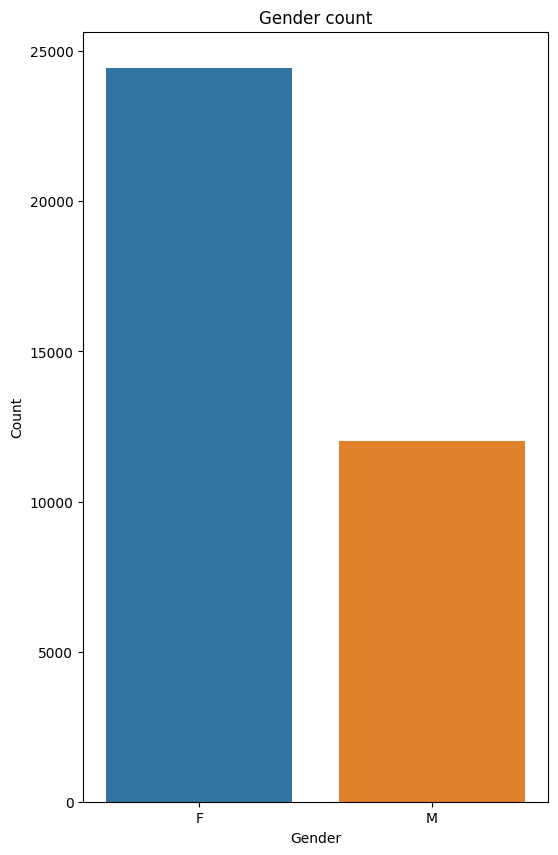

In [42]:
create_bar_plot(full_data, "Gender")

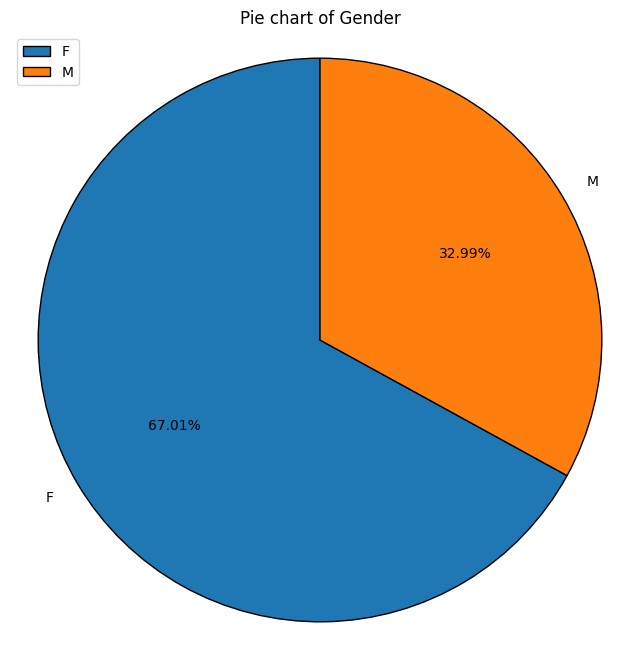

In [43]:
create_pie_plot(full_data, "Gender")

Nhận xét:
- Ta thấy Female chiếm nhiều Male(67% vs 33%)

#### 2.3.2 Age

In [44]:
get_info_feat(full_data, "Age")

Description:
count    36457.000000
mean        43.737641
std         11.500479
min         20.503765
25%         34.119097
50%         42.609172
75%         53.218344
max         68.862423
Name: Age, dtype: float64
**************************************************
Object type:int64


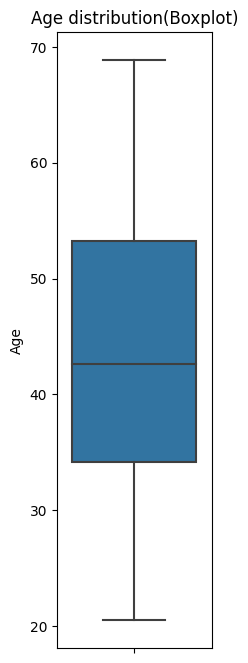

In [45]:
create_box_plot(full_data, "Age")

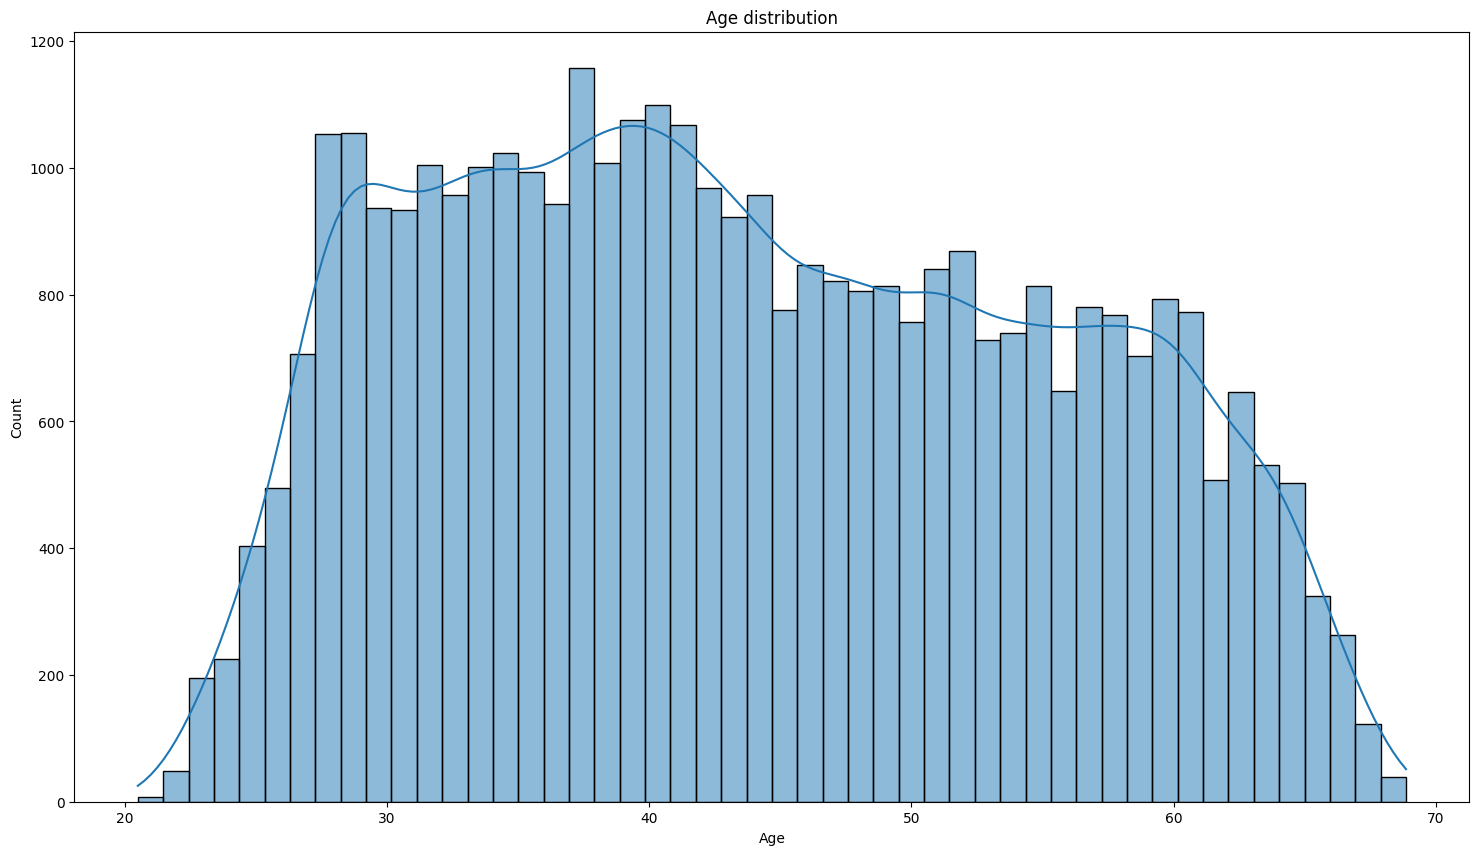

In [46]:
create_hist_plot(full_data, "Age")

Is high risk
0    43.739870
1    43.607954
Name: Age, dtype: float64


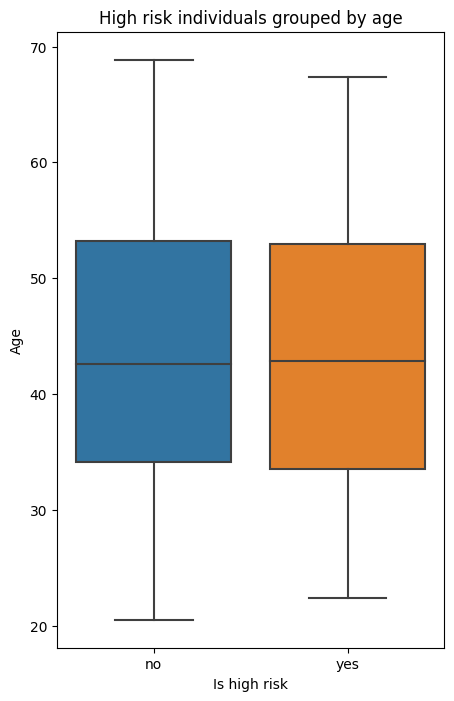

In [48]:
low_high_risk_box_plot(full_data, "Age")

Nhận xét:
- Người có độ tuổi trẻ nhất là 21 tuổi và già nhất có tuổi là 69 tuổi
- Trung bình độ tuổi là 43 tuổi
- Từ biểu đồ thấy,  phân bố độ tuổi phân phối không bình thường và có xu hướng hơi lệch trái
- Từ biểu đồ box-plot ta thấy nhóm high risk và low risk không có sự khác nhau về mặt độ tuổi

#### 2.3.2 Marital status (Tình trạng hôn nhân)

In [51]:
get_info_feat(full_data, "Marital status")

Description:
count       36457
unique          5
top       Married
freq        25048
Name: Marital status, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                      Count  Frequency (%)
Married               25048      68.705598
Single / not married   4829      13.245742
Civil marriage         2945       8.078010
Separated              2103       5.768440
Widow                  1532       4.202211


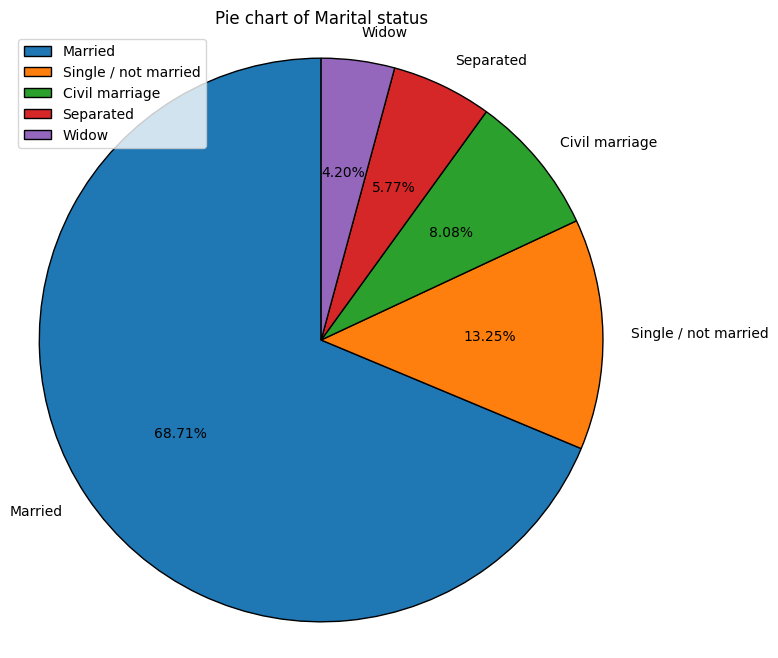

In [52]:
create_pie_plot(full_data, "Marital status")

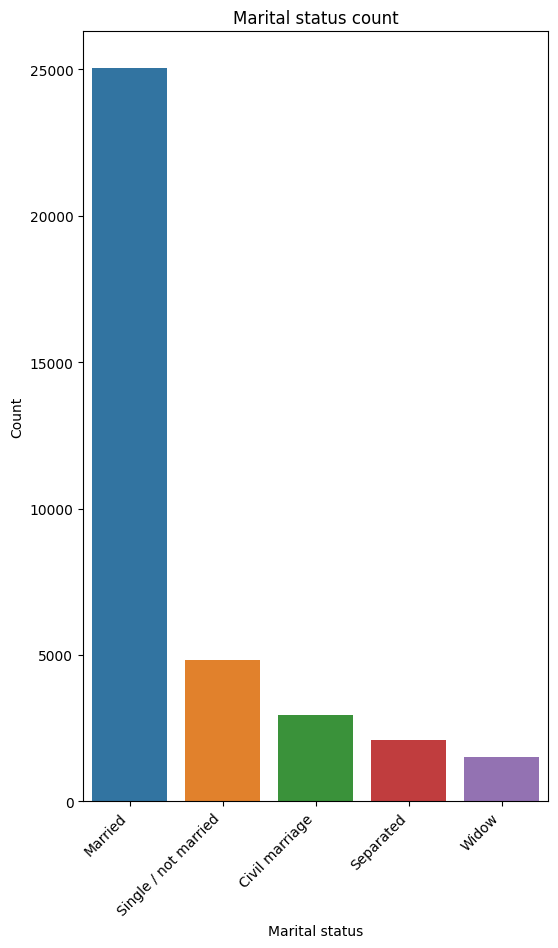

In [53]:
create_bar_plot(full_data, "Marital status")

{'Married': 393, 'Single / not married': 101, 'Civil marriage': 46, 'Widow': 45, 'Separated': 31}


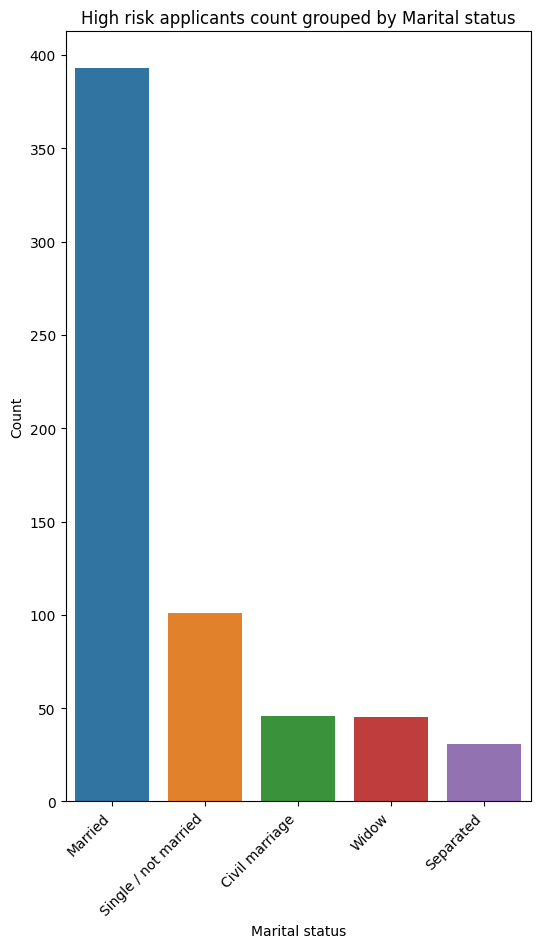

In [54]:
low_high_risk_bar_plot(full_data, "Marital status")

Nhận xét:
- Tình trạng hôn nhân đã kết hôn chiếm chủ yếu 70% sau đố là độc thân/ chưa kết hôn chiếm 13%
- So sánh khi gom nhóm high risk ta thấy không có sự tách biệt lắm giữa các tình trạng hôn nhân

#### 2.3.4 Family count

In [55]:
get_info_feat(full_data, "Family member count")

Description:
count    36457.000000
mean         2.198453
std          0.911686
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: Family member count, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
      Count  Frequency (%)
2.0   19463      53.386181
1.0    6987      19.165044
3.0    6421      17.612530
4.0    3106       8.519626
5.0     397       1.088954
6.0      58       0.159092
7.0      19       0.052116
15.0      3       0.008229
9.0       2       0.005486
20.0      1       0.002743


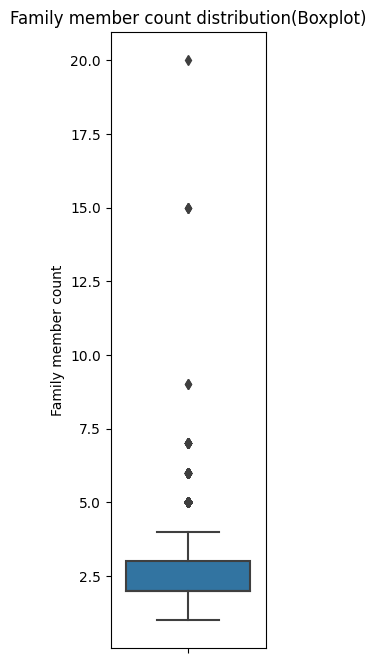

In [56]:
create_box_plot(full_data, "Family member count")

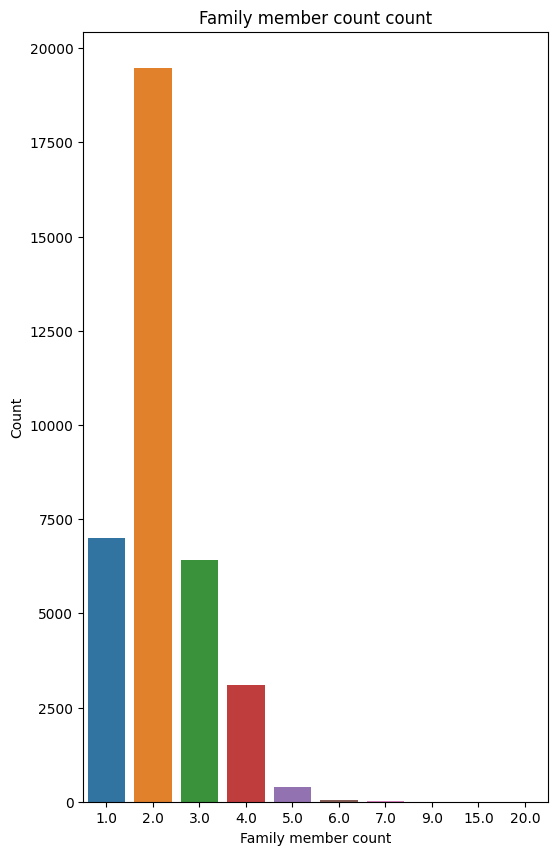

In [57]:
create_bar_plot(full_data, "Family member count")

Nhận xét:
- Từ biểu đồ bar chart ta thấy gia đình thường có 2 người tức là tập trung chủ yếu ở gia đình chưa có con
- Từ biểu đồ box plot ta cũng thấy có 6 outlier rất lớn như có 15 - 20 người trong một hộ gia đình

#### 2.3.5 Chilren count

In [59]:
get_info_feat(full_data, "Children count")

Description:
count    36457.000000
mean         0.430315
std          0.742367
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: Children count, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
    Count  Frequency (%)
0   25201      69.125271
1    7492      20.550237
2    3256       8.931069
3     419       1.149299
4      63       0.172806
5      20       0.054859
14      3       0.008229
7       2       0.005486
19      1       0.002743


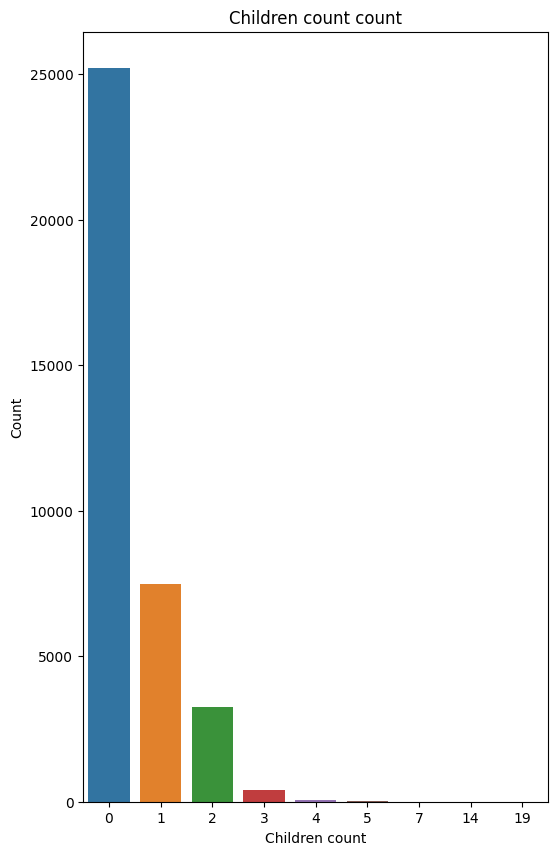

In [60]:
create_bar_plot(full_data, "Children count")

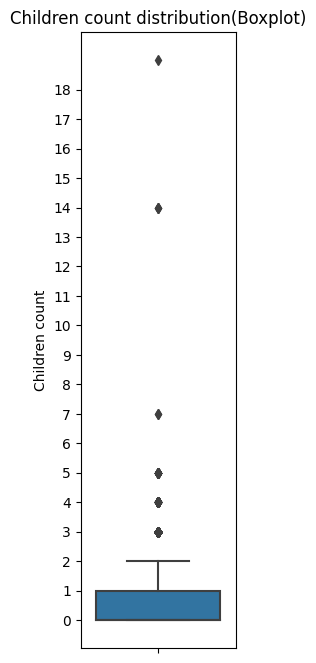

In [61]:
create_box_plot(full_data, "Children count")

{0: 431, 1: 120, 2: 52, 3: 12, 4: 1, 5: 0, 7: 0, 14: 0, 19: 0}


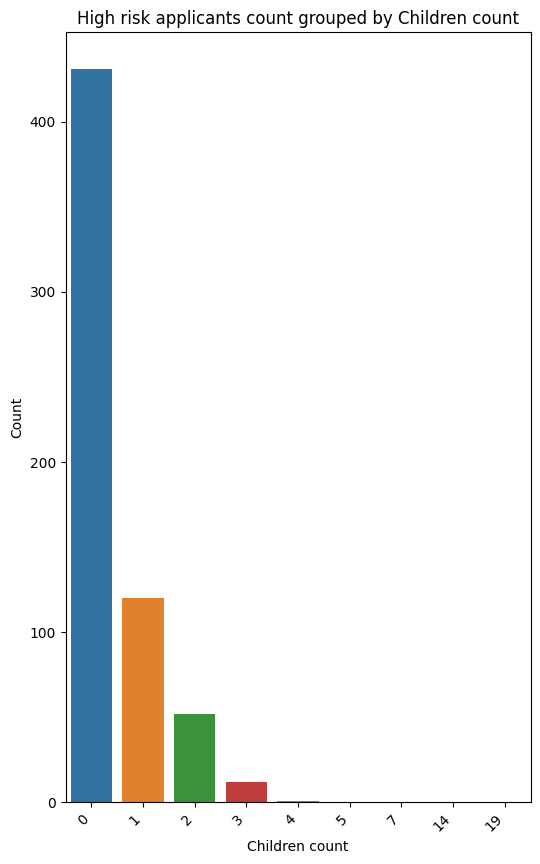

In [62]:
low_high_risk_bar_plot(full_data, "Children count")

Nhận xét
- Các hộ gia đình có xu hướng không có con hoặc có 1 con
- Tương tự như phần số lượng thành viên trong gia đình ta vẫn có 6 outlier

#### 2.3.6 Drewling type (Loại nhà ở)

In [63]:
get_info_feat(full_data, "Dwelling")

Description:
count                 36457
unique                    6
top       House / apartment
freq                  32548
Name: Dwelling, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                     Count  Frequency (%)
House / apartment    32548      89.277779
With parents          1776       4.871492
Municipal apartment   1128       3.094056
Rented apartment       575       1.577201
Office apartment       262       0.718655
Co-op apartment        168       0.460817


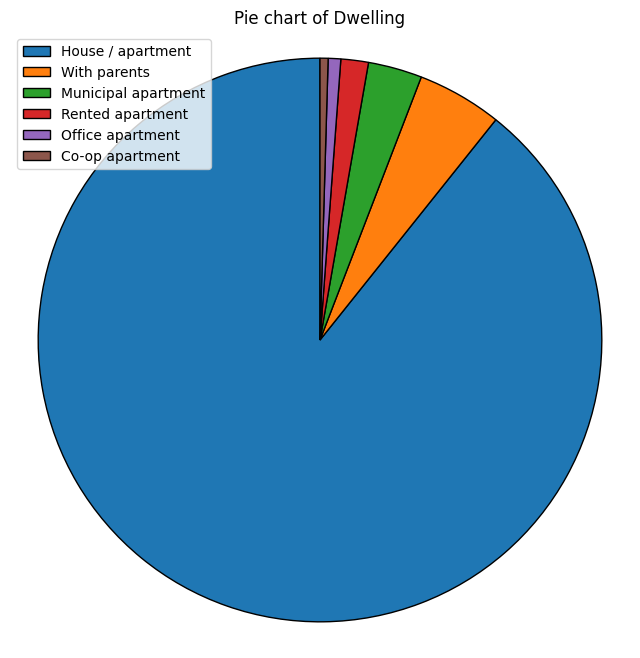

In [64]:
create_pie_plot(full_data, "Dwelling")

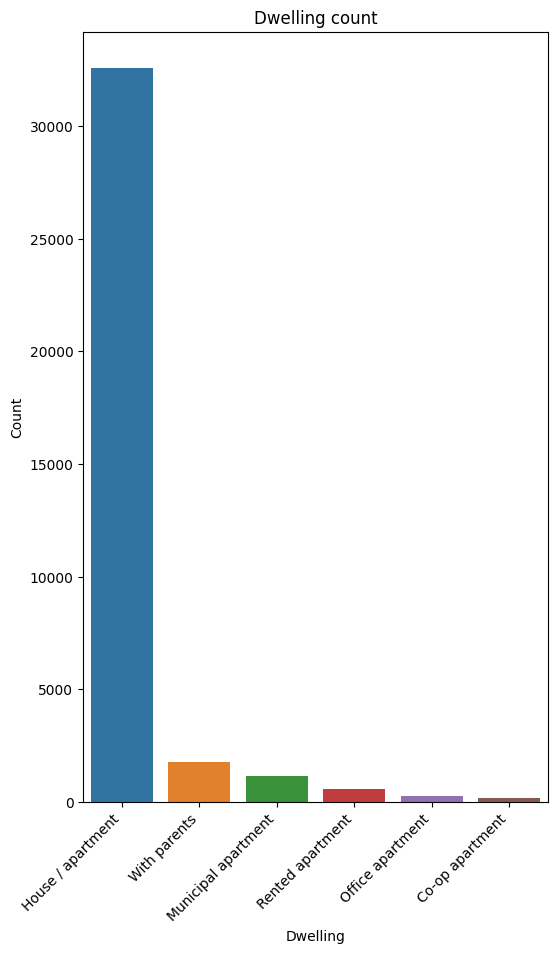

In [65]:
create_bar_plot(full_data, "Dwelling")

Nhận xét:
- Loại cư trú chiếm đa số là nhà/ căn hộ

#### 2.3.7 Income(Thu nhập)

In [68]:
get_info_feat(full_data, "Income")

Description:
count    3.645700e+04
mean     1.866857e+05
std      1.017892e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: Income, dtype: float64
**************************************************
Object type:
float64
**************************************************
Value count:
          Count  Frequency (%)
135000.0   4309      11.819404
180000.0   3097       8.494939
157500.0   3089       8.472996
112500.0   2956       8.108182
225000.0   2926       8.025894
...         ...            ...
177750.0      1       0.002743
594000.0      1       0.002743
164250.0      1       0.002743
124200.0      1       0.002743
179271.0      1       0.002743

[265 rows x 2 columns]


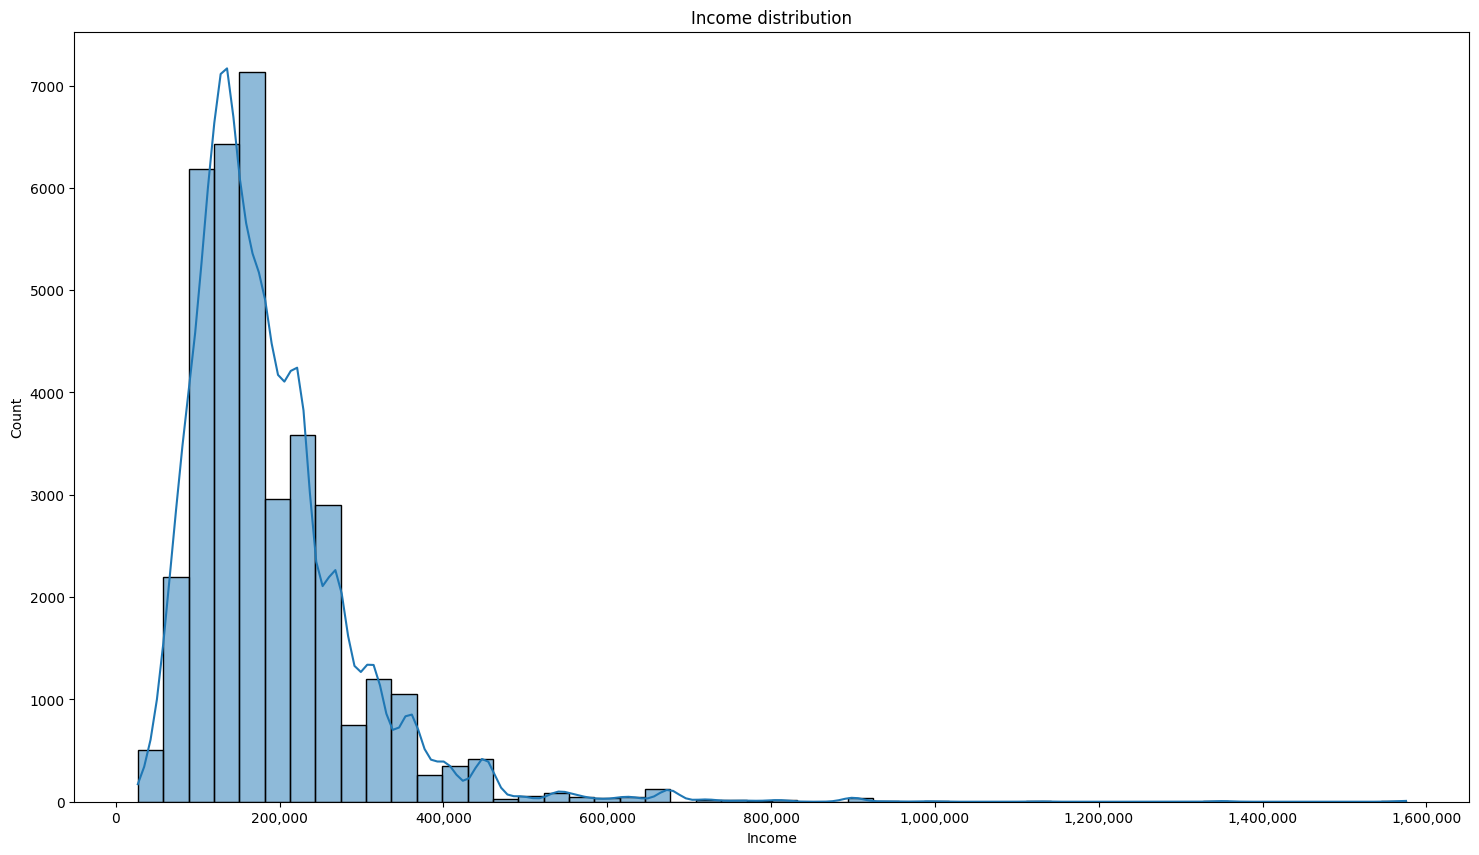

In [69]:
create_hist_plot(full_data, "Income")

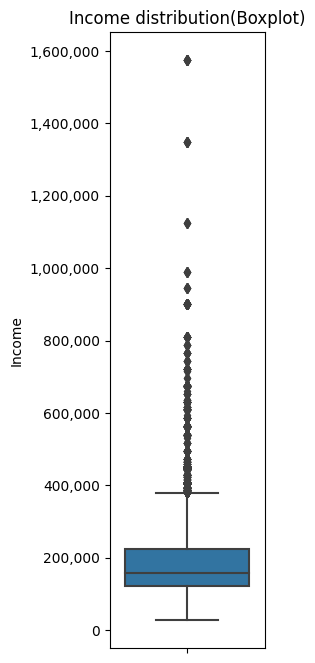

In [70]:
create_box_plot(full_data, "Income")

Is high risk
0    186699.846740
1    185864.763799
Name: Income, dtype: float64


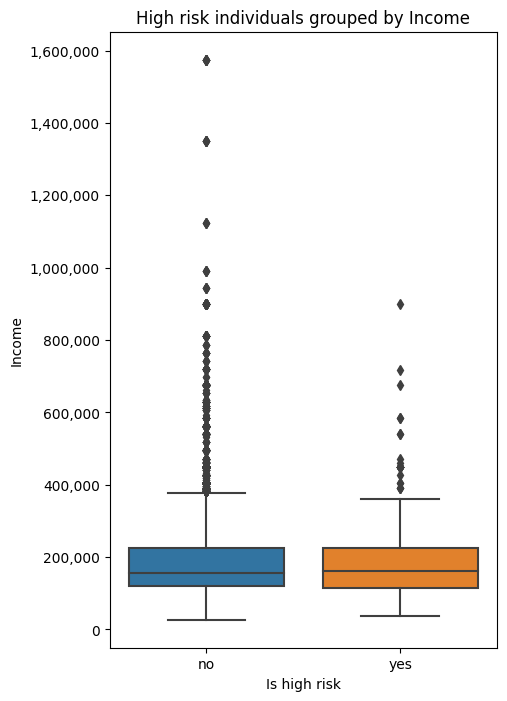

In [71]:
low_high_risk_box_plot(full_data, "Income")

Nhận xét:
- Không có sự khác nhau giữ high risk và low risk giữa các nhóm thu nhập khác nhau
- Phân bố thu nhập có xu hướng lệch bên trái
- Có 3 ứng viên thu nhập trên 1.000.000

#### 2.3.8 Job title

In [72]:
get_info_feat(full_data, "Job title")

Description:
count        25134
unique          18
top       Laborers
freq          6211
Name: Job title, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                       Count  Frequency (%)
Laborers                6211      24.711546
Core staff              3591      14.287419
Sales staff             3485      13.865680
Managers                3012      11.983767
Drivers                 2138       8.506406
High skill tech staff   1383       5.502507
Accountants             1241       4.937535
Medicine staff          1207       4.802260
Cooking staff            655       2.606032
Security staff           592       2.355375
Cleaning staff           551       2.192250
Private service staff    344       1.368664
Low-skill Laborers       175       0.696268
Waiters/barmen staff     174       0.692289
Secretaries              151       0.600780
HR staff                  85       0.3381

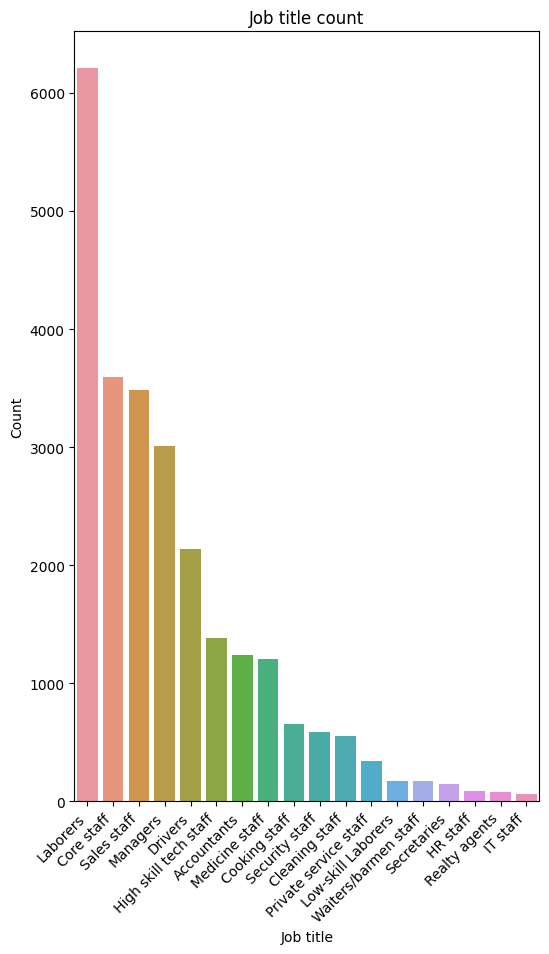

In [73]:
create_bar_plot(full_data, "Job title")

Nhận xét:
- Chủ yếu nghề nghiệp là người lao động (Laborers)
- Dữ liệu bị thiếu rất nhiều